# NGUYỄN TRÍ SỰ: CLASSIFICATION MODELS & FINAL INTEGRATION 

## 1. IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report)
import pickle

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("Set2")

## 2. LOAD DATA

In [2]:
df = pd.read_csv('../data/processed/cleaned_data.csv')
print(f"\n Đã load data: {df.shape[0]:,} rows × {df.shape[1]} columns")


 Đã load data: 99,457 rows × 29 columns


## 3. CHUẨN BỊ DỮ LIỆU CHO CLASSIFICATION

In [3]:
print("\nCHỌN FEATURES VÀ TARGET:")
print("  Target: category (danh mục sản phẩm)")
print("  Features: age, gender, payment_method, shopping_mall, ")
print("           month, day_of_week, hour, is_weekend")

# Define features và target
feature_cols = ['age', 'gender_encoded', 'payment_method_encoded', 
                'shopping_mall_encoded', 'month', 'day_of_week', 
                'hour', 'is_weekend']

# Filter columns that exist
feature_cols = [col for col in feature_cols if col in df.columns]

# Nếu không có encoded columns, encode lại
if 'gender_encoded' not in df.columns and 'gender' in df.columns:
    print("\n  Encoding categorical features...")
    le_gender = LabelEncoder()
    df['gender_encoded'] = le_gender.fit_transform(df['gender'].astype(str))
    
if 'payment_method_encoded' not in df.columns and 'payment_method' in df.columns:
    le_payment = LabelEncoder()
    df['payment_method_encoded'] = le_payment.fit_transform(df['payment_method'].astype(str))
    
if 'shopping_mall_encoded' not in df.columns and 'shopping_mall' in df.columns:
    le_mall = LabelEncoder()
    df['shopping_mall_encoded'] = le_mall.fit_transform(df['shopping_mall'].astype(str))

# Update feature_cols
feature_cols = ['age', 'gender_encoded', 'payment_method_encoded', 
                'shopping_mall_encoded', 'month', 'day_of_week', 
                'hour', 'is_weekend']
feature_cols = [col for col in feature_cols if col in df.columns]

# Encode target
if 'category' in df.columns:
    le_category = LabelEncoder()
    df['category_encoded'] = le_category.fit_transform(df['category'].astype(str))
    
    X = df[feature_cols]
    y = df['category_encoded']
    
    print(f"\n  Features shape: {X.shape}")
    print(f"  Target classes: {len(le_category.classes_)}")
    print(f"\n  Classes: {le_category.classes_}")


CHỌN FEATURES VÀ TARGET:
  Target: category (danh mục sản phẩm)
  Features: age, gender, payment_method, shopping_mall, 
           month, day_of_week, hour, is_weekend

  Features shape: (99457, 8)
  Target classes: 8

  Classes: ['Books' 'Clothing' 'Cosmetics' 'Food & Beverage' 'Shoes' 'Souvenir'
 'Technology' 'Toys']


## 4. TRAIN-TEST SPLIT

In [4]:
print("\nTRAIN-TEST SPLIT:")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                      random_state=42, 
                                                      stratify=y)

print(f"  Training set: {X_train.shape[0]:,} samples")
print(f"  Testing set: {X_test.shape[0]:,} samples")
print(f"  Split ratio: 70% train, 30% test")


TRAIN-TEST SPLIT:
  Training set: 69,619 samples
  Testing set: 29,838 samples
  Split ratio: 70% train, 30% test


## 5. DECISION TREE CLASSIFIER

In [5]:
print("\n TRAINING DECISION TREE:")

dt_model = DecisionTreeClassifier(max_depth=10, random_state=42, 
                                  min_samples_split=50, 
                                  min_samples_leaf=20,class_weight='balanced')
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Metrics
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt, average='weighted')
dt_recall = recall_score(y_test, y_pred_dt, average='weighted')
dt_f1 = f1_score(y_test, y_pred_dt, average='weighted')

print(f"\n  METRICS:")
print(f"  - Accuracy:  {dt_accuracy:.4f}")
print(f"  - Precision: {dt_precision:.4f}")
print(f"  - Recall:    {dt_recall:.4f}")
print(f"  - F1-Score:  {dt_f1:.4f}")


 TRAINING DECISION TREE:

  METRICS:
  - Accuracy:  0.0770
  - Precision: 0.1950
  - Recall:    0.0770
  - F1-Score:  0.0699



 FEATURE IMPORTANCE:
               Feature  Importance
                   age    0.290915
 shopping_mall_encoded    0.194544
           day_of_week    0.180278
                 month    0.149844
payment_method_encoded    0.098936
        gender_encoded    0.074118
            is_weekend    0.011367
                  hour    0.000000


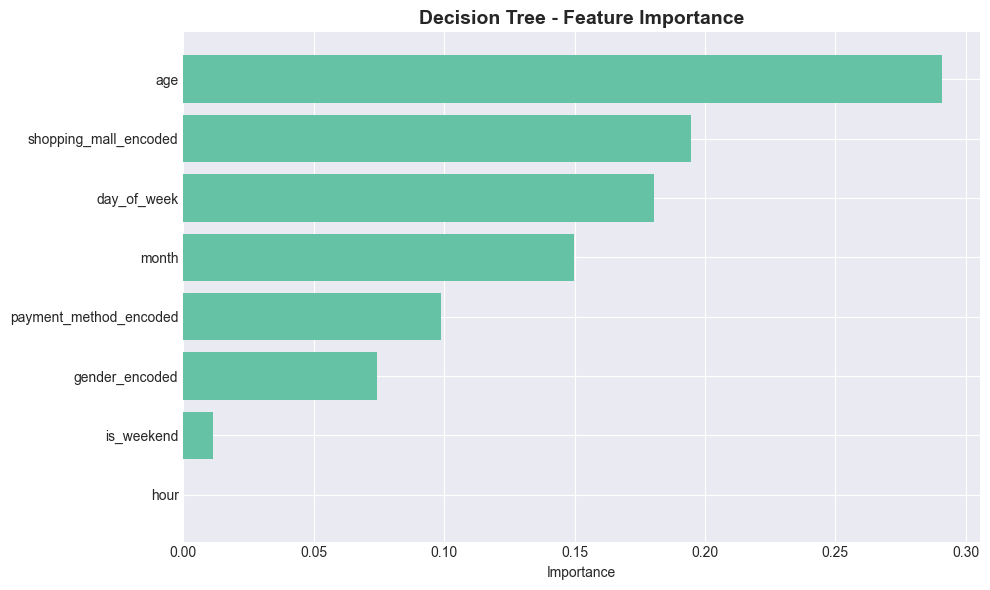


 Đã lưu: figures/01_dt_feature_importance.png


In [6]:
# Feature Importance
print("\n FEATURE IMPORTANCE:")
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.to_string(index=False))

# Visualize Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Decision Tree - Feature Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('figures/01_dt_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n Đã lưu: figures/01_dt_feature_importance.png")


 VISUALIZE DECISION TREE:


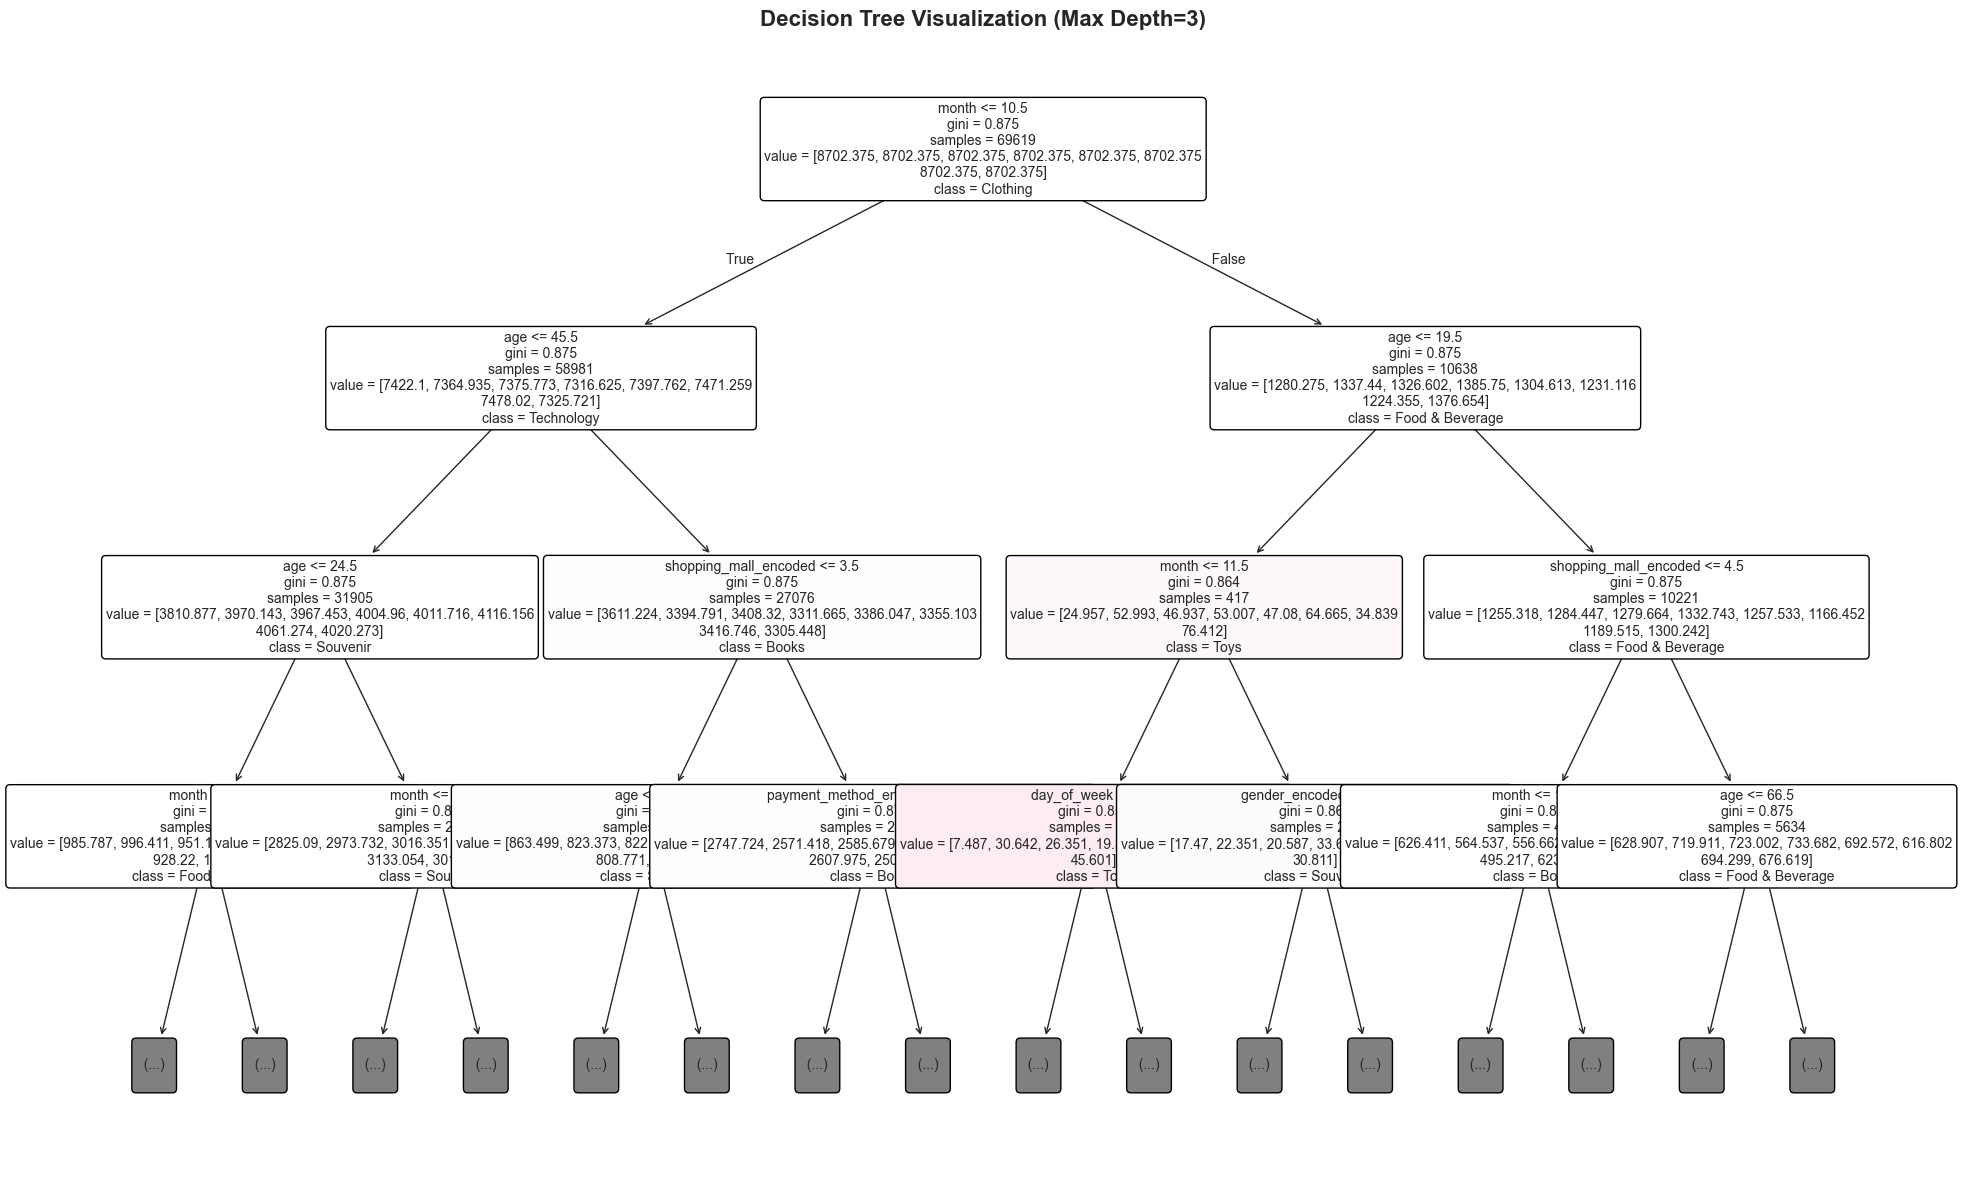

 Đã lưu: figures/02_decision_tree_viz.png


In [7]:
# Visualize Decision Tree
print("\n VISUALIZE DECISION TREE:")

plt.figure(figsize=(20, 12))
plot_tree(dt_model, 
          feature_names=X.columns,
          class_names=le_category.classes_,
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=3)  
plt.title('Decision Tree Visualization (Max Depth=3)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('figures/02_decision_tree_viz.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Đã lưu: figures/02_decision_tree_viz.png")


 CONFUSION MATRIX:


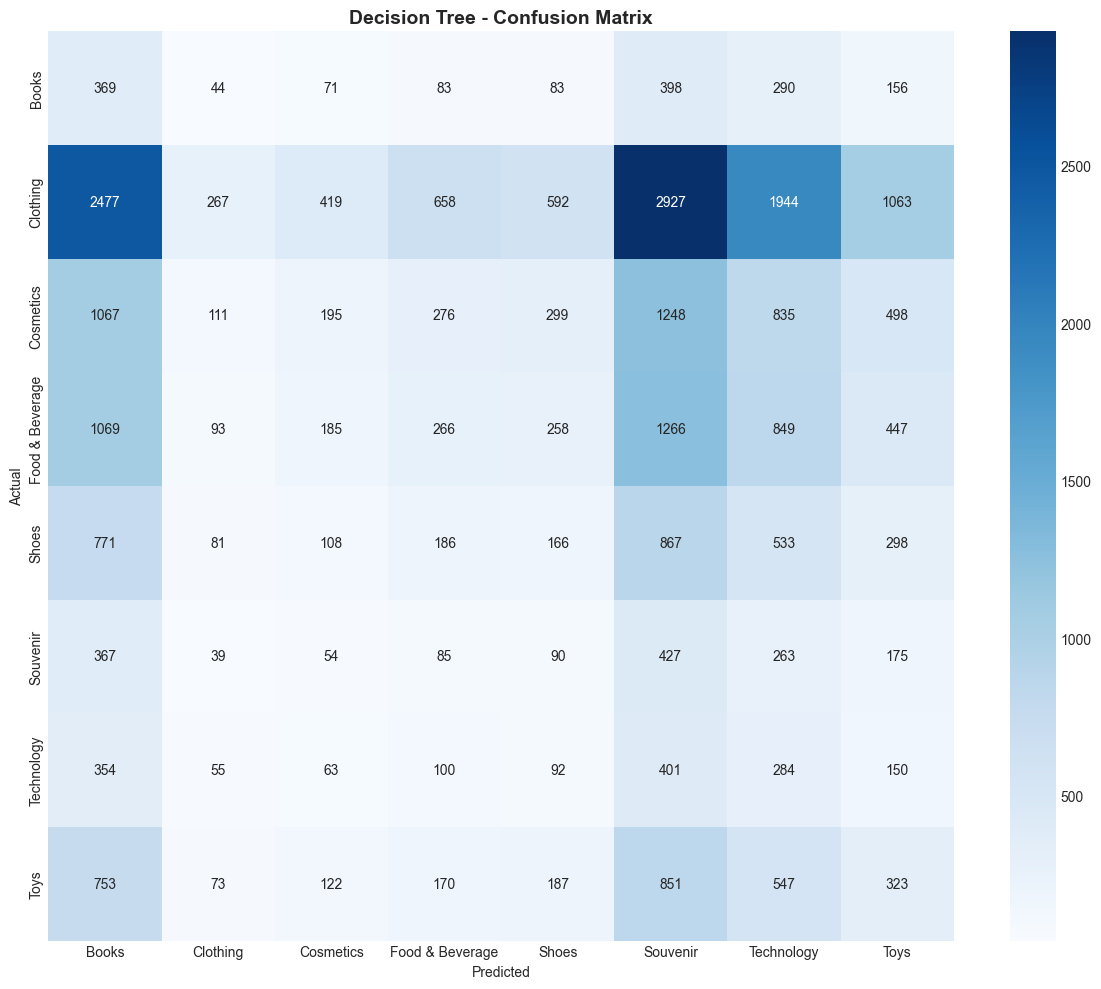

 Đã lưu: figures/03_dt_confusion_matrix.png


In [8]:
# Confusion Matrix
print("\n CONFUSION MATRIX:")

cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(12, 10))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_category.classes_,
            yticklabels=le_category.classes_)
plt.title('Decision Tree - Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('figures/03_dt_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Đã lưu: figures/03_dt_confusion_matrix.png")

## 6. RANDOM FOREST CLASSIFIER

In [9]:
print("\n TRAINING RANDOM FOREST:")

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, 
                                  random_state=42, n_jobs=-1, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

print(f"\n  METRICS:")
print(f"  - Accuracy:  {rf_accuracy:.4f}")
print(f"  - Precision: {rf_precision:.4f}")
print(f"  - Recall:    {rf_recall:.4f}")
print(f"  - F1-Score:  {rf_f1:.4f}")



 TRAINING RANDOM FOREST:

  METRICS:
  - Accuracy:  0.1093
  - Precision: 0.1950
  - Recall:    0.1093
  - F1-Score:  0.1184


In [10]:
# Feature Importance
print("\n FEATURE IMPORTANCE:")
rf_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(rf_feature_importance.to_string(index=False))


 FEATURE IMPORTANCE:
               Feature  Importance
                   age    0.318610
                 month    0.207576
 shopping_mall_encoded    0.206681
           day_of_week    0.119296
payment_method_encoded    0.080715
        gender_encoded    0.049554
            is_weekend    0.017568
                  hour    0.000000


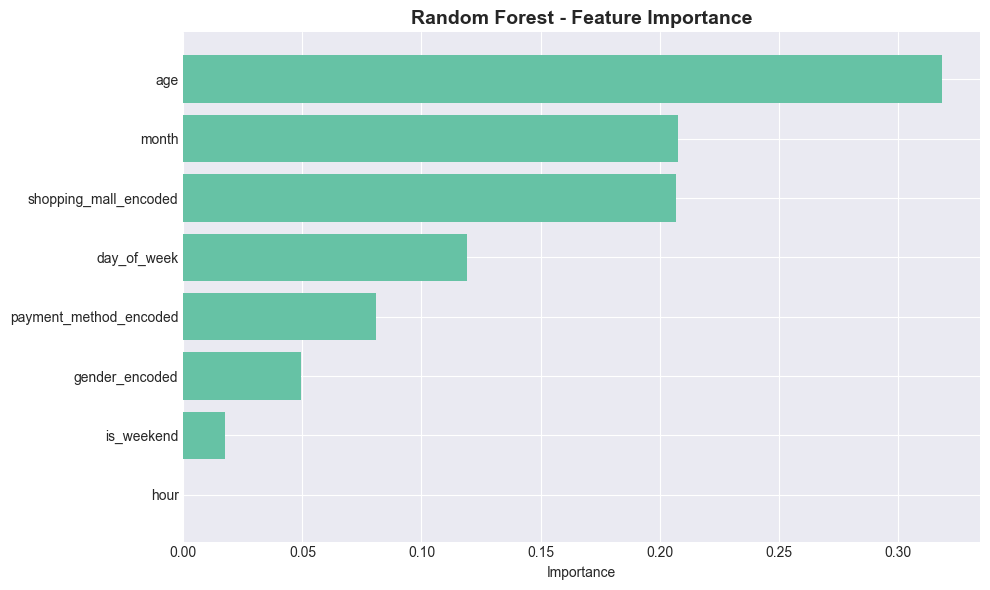


 Đã lưu: figures/04_rf_feature_importance.png


In [11]:
# Visualize
plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importance['Feature'], rf_feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Random Forest - Feature Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('figures/04_rf_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n Đã lưu: figures/04_rf_feature_importance.png")

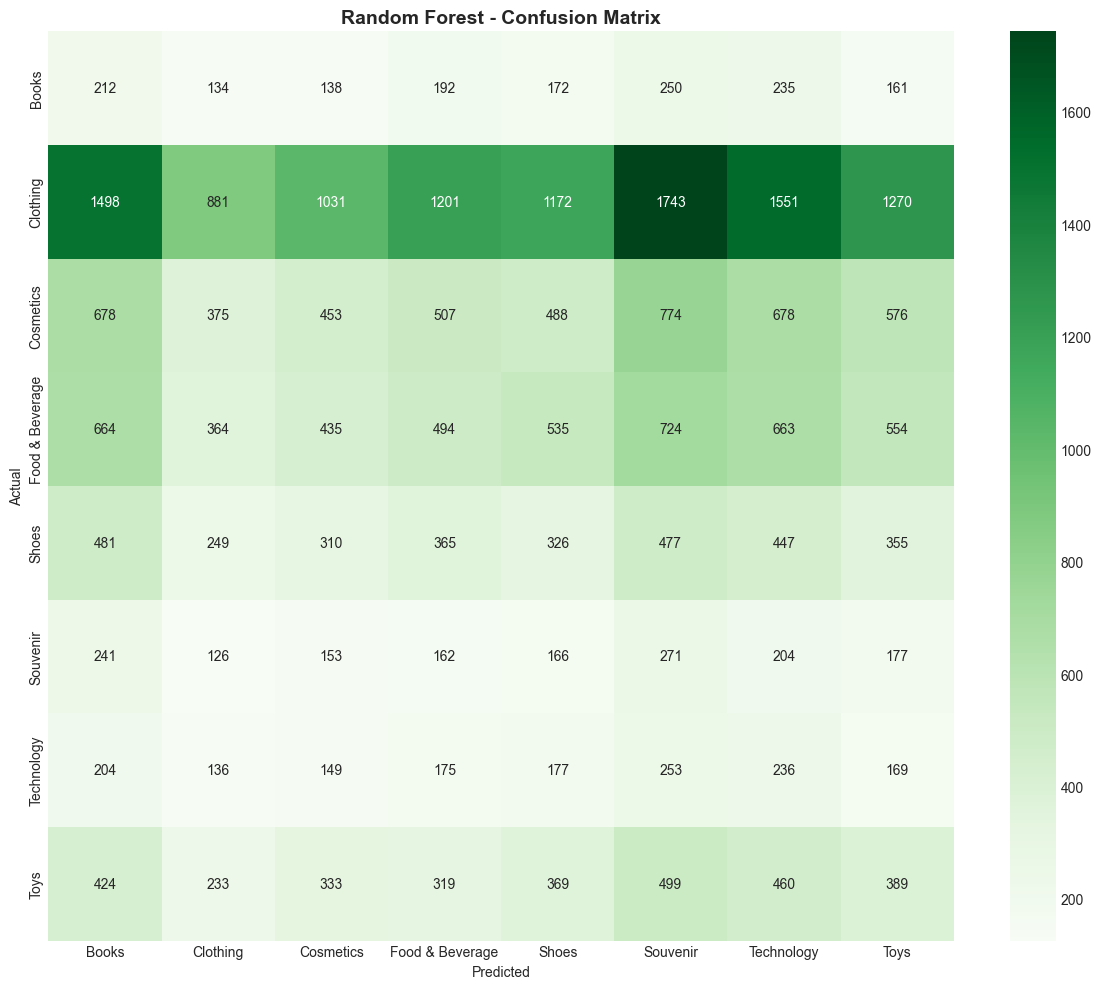

 Đã lưu: figures/05_rf_confusion_matrix.png


In [12]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(12, 10))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=le_category.classes_,
            yticklabels=le_category.classes_)
plt.title('Random Forest - Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('figures/05_rf_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Đã lưu: figures/05_rf_confusion_matrix.png")

## 7. NAIVE BAYES CLASSIFIER

In [13]:
print("\n TRAINING NAIVE BAYES:")

n_classes = len(np.unique(y_train))

nb_model = GaussianNB(priors=[1/n_classes] * n_classes)
nb_model.fit(X_train, y_train)

# Predictions
y_pred_nb = nb_model.predict(X_test)

# Metrics
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb, average='weighted')
nb_recall = recall_score(y_test, y_pred_nb, average='weighted')
nb_f1 = f1_score(y_test, y_pred_nb, average='weighted')

print(f"\n  METRICS:")
print(f"  - Accuracy:  {nb_accuracy:.4f}")
print(f"  - Precision: {nb_precision:.4f}")
print(f"  - Recall:    {nb_recall:.4f}")
print(f"  - F1-Score:  {nb_f1:.4f}")


 TRAINING NAIVE BAYES:

  METRICS:
  - Accuracy:  0.0968
  - Precision: 0.1884
  - Recall:    0.0968
  - F1-Score:  0.0995


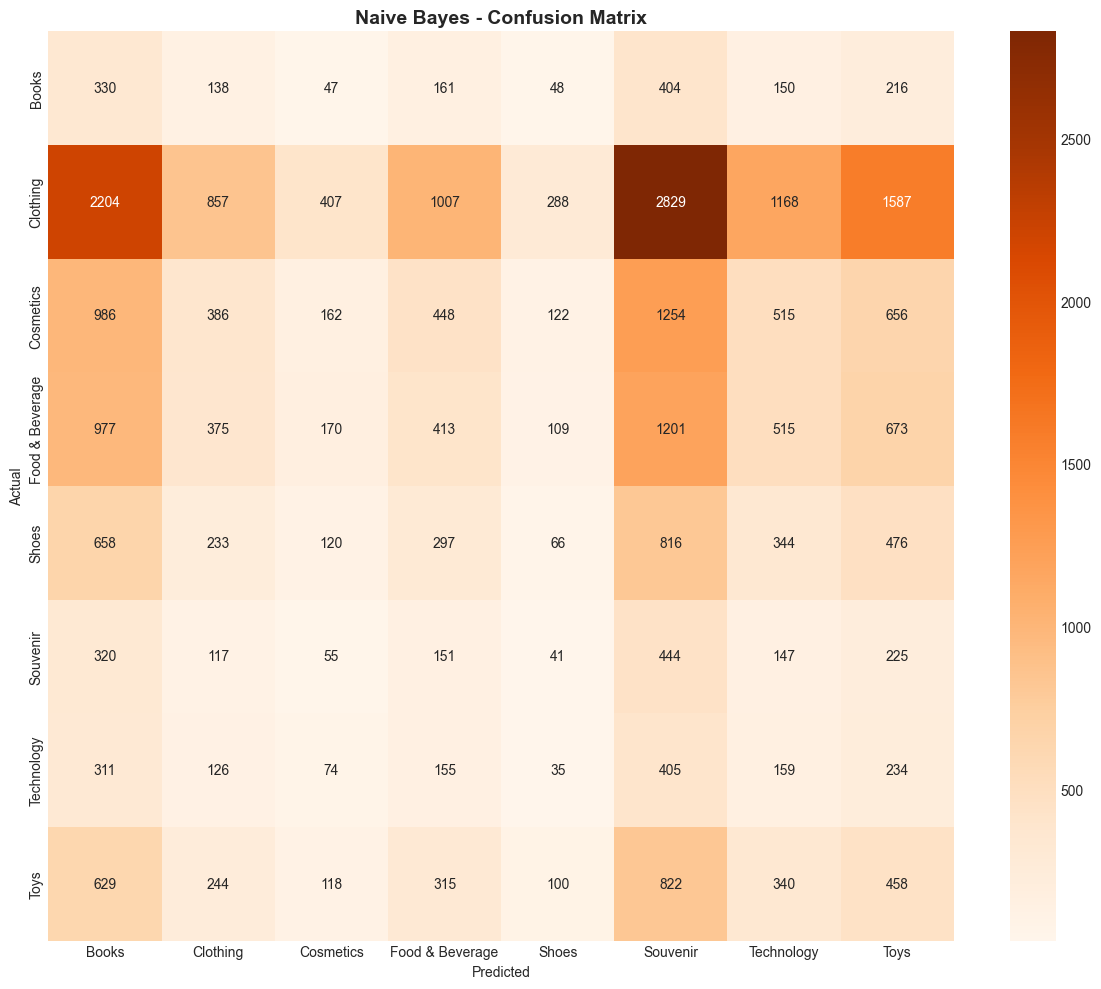

 Đã lưu: figures/06_nb_confusion_matrix.png


In [14]:
# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(12, 10))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=le_category.classes_,
            yticklabels=le_category.classes_)
plt.title('Naive Bayes - Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('figures/06_nb_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Đã lưu: figures/06_nb_confusion_matrix.png")

## 8. MODEL COMPARISON


 METRICS COMPARISON:

        Model  Accuracy  Precision   Recall  F1-Score
Decision Tree  0.076982   0.195034 0.076982  0.069921
Random Forest  0.109324   0.194951 0.109324  0.118370
  Naive Bayes  0.096823   0.188367 0.096823  0.099520


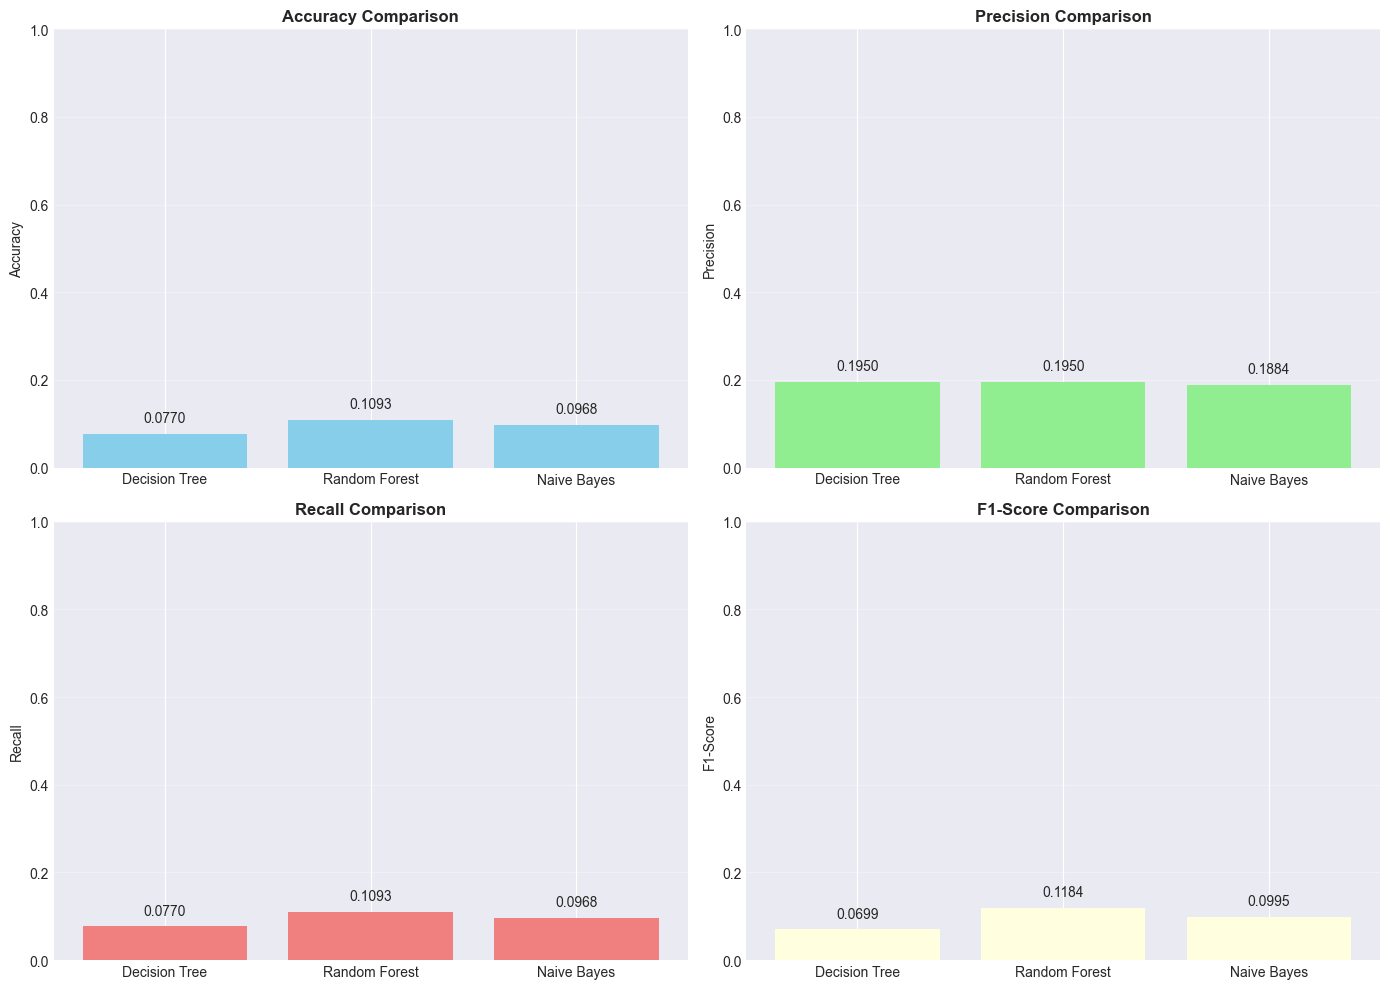


 Đã lưu: figures/07_model_comparison.png

 BEST MODEL: Random Forest
    F1-Score: 0.1184


In [15]:
#SO SÁNH CÁC MÔ HÌNH

# Tạo comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Naive Bayes'],
    'Accuracy': [dt_accuracy, rf_accuracy, nb_accuracy],
    'Precision': [dt_precision, rf_precision, nb_precision],
    'Recall': [dt_recall, rf_recall, nb_recall],
    'F1-Score': [dt_f1, rf_f1, nb_f1]
})
print("\n METRICS COMPARISON:")
print("\n" + comparison_df.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightyellow']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    ax.bar(comparison_df['Model'], comparison_df[metric], color=colors[idx])
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} Comparison', fontweight='bold')
    ax.set_ylim([0, 1])
    ax.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, v in enumerate(comparison_df[metric]):
        ax.text(i, v + 0.02, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('figures/07_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n Đã lưu: figures/07_model_comparison.png")

# Best model
best_model_idx = comparison_df['F1-Score'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
print(f"\n BEST MODEL: {best_model_name}")
print(f"    F1-Score: {comparison_df.loc[best_model_idx, 'F1-Score']:.4f}")

## 9. CROSS-VALIDATION


 5-FOLD STRATIFIED CROSS-VALIDATION:
  Sử dụng StratifiedKFold để duy trì class distribution trong mỗi fold

  Decision Tree:
    Mean F1: 0.0803 (+/- 0.0159)
    All Folds: ['0.1071', '0.0594', '0.0824', '0.0821', '0.0705']

  Random Forest:
    Mean F1: 0.1139 (+/- 0.0046)
    All Folds: ['0.1116', '0.1085', '0.1179', '0.1208', '0.1109']

  Naive Bayes:
    Mean F1: 0.0849 (+/- 0.0101)
    All Folds: ['0.1038', '0.0767', '0.0760', '0.0857', '0.0822']


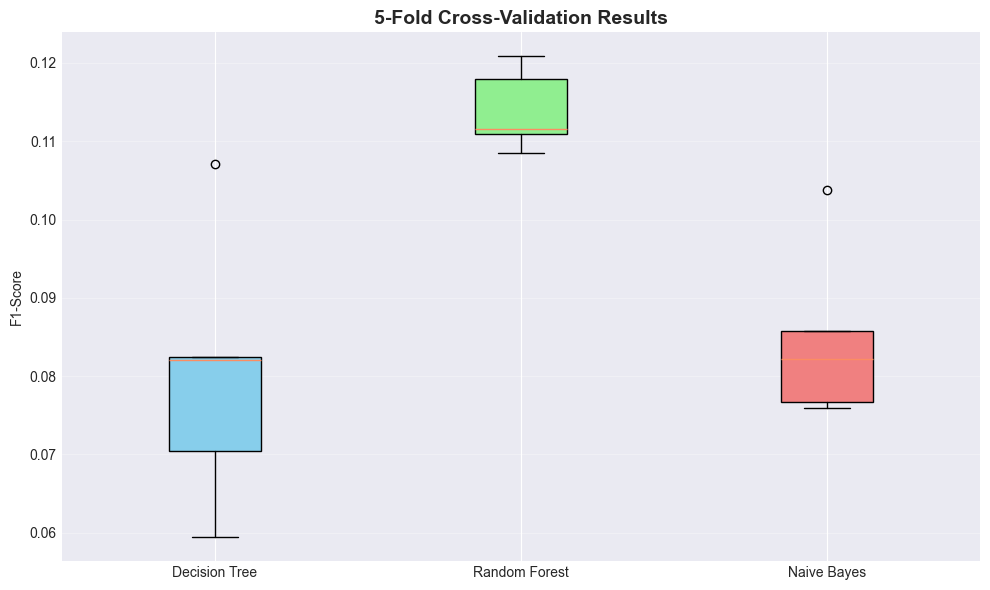


 Đã lưu: figures/08_cross_validation.png


In [24]:
print("\n 5-FOLD STRATIFIED CROSS-VALIDATION:")
print("  Sử dụng StratifiedKFold để duy trì class distribution trong mỗi fold")

models = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Naive Bayes': nb_model
}

cv_results = {}
cv_splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv_splitter, scoring='f1_weighted')
    cv_results[name] = {
        'Mean': scores.mean(),
        'Std': scores.std(),
        'Scores': scores
    }
    print(f"\n  {name}:")
    print(f"    Mean F1: {scores.mean():.4f} (+/- {scores.std():.4f})")
    print(f"    All Folds: {[f'{s:.4f}' for s in scores]}")

# Visualize CV results
plt.figure(figsize=(10, 6))
bp = plt.boxplot([cv_results[name]['Scores'] for name in models.keys()],
                  labels=list(models.keys()),
                  patch_artist=True)

for patch, color in zip(bp['boxes'], ['skyblue', 'lightgreen', 'lightcoral']):
    patch.set_facecolor(color)

plt.ylabel('F1-Score')
plt.title('5-Fold Cross-Validation Results', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('figures/08_cross_validation.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n Đã lưu: figures/08_cross_validation.png")

## 10. CLASSIFICATION REPORT

In [17]:
print("\n Lưu ý quan trọng về Imbalanced Data:")
print("  - Support: số samples thực tế của mỗi class")
print("  - Precision/Recall/F1 per class cho thấy performance trên từng category")
print("  - Weighted avg: tính trung bình có trọng số theo số lượng samples")
print("  - Macro avg: tính trung bình không trọng số (tất cả classes bình đẳng)")

print("\n[1] DECISION TREE:")
print(classification_report(y_test, y_pred_dt, target_names=le_category.classes_, zero_division=0))

print("\n[2] RANDOM FOREST:")
print(classification_report(y_test, y_pred_rf, target_names=le_category.classes_, zero_division=0))

print("\n[3] NAIVE BAYES:")
print(classification_report(y_test, y_pred_nb, target_names=le_category.classes_, zero_division=0))


 Lưu ý quan trọng về Imbalanced Data:
  - Support: số samples thực tế của mỗi class
  - Precision/Recall/F1 per class cho thấy performance trên từng category
  - Weighted avg: tính trung bình có trọng số theo số lượng samples
  - Macro avg: tính trung bình không trọng số (tất cả classes bình đẳng)

[1] DECISION TREE:
                 precision    recall  f1-score   support

          Books       0.05      0.25      0.08      1494
       Clothing       0.35      0.03      0.05     10347
      Cosmetics       0.16      0.04      0.07      4529
Food & Beverage       0.15      0.06      0.09      4433
          Shoes       0.09      0.06      0.07      3010
       Souvenir       0.05      0.28      0.09      1500
     Technology       0.05      0.19      0.08      1499
           Toys       0.10      0.11      0.11      3026

       accuracy                           0.08     29838
      macro avg       0.13      0.13      0.08     29838
   weighted avg       0.20      0.08      0.07     

In [18]:
# Phân tích per-class performance

print("PHÂN TÍCH PERFORMANCE THEO CLASS")

print("\n SO SÁNH PERFORMANCE TRÊN MINORITY vs MAJORITY CLASSES:")

# Lấy class distribution
class_counts = pd.Series(y_test).value_counts()
majority_classes = class_counts.head(3).index.tolist()
minority_classes = class_counts.tail(3).index.tolist()

print(f"\n  Majority classes (top 3): {[le_category.classes_[i] for i in majority_classes]}")
print(f"  Minority classes (bottom 3): {[le_category.classes_[i] for i in minority_classes]}")


PHÂN TÍCH PERFORMANCE THEO CLASS

 SO SÁNH PERFORMANCE TRÊN MINORITY vs MAJORITY CLASSES:

  Majority classes (top 3): ['Clothing', 'Cosmetics', 'Food & Beverage']
  Minority classes (bottom 3): ['Souvenir', 'Technology', 'Books']



  Random Forest F1-Score:
    - Trung bình trên majority classes: 0.1278
    - Trung bình trên minority classes: 0.0781

   Nếu chênh lệch lớn -> mô hình có xu hướng thiên vị các lớp đa số


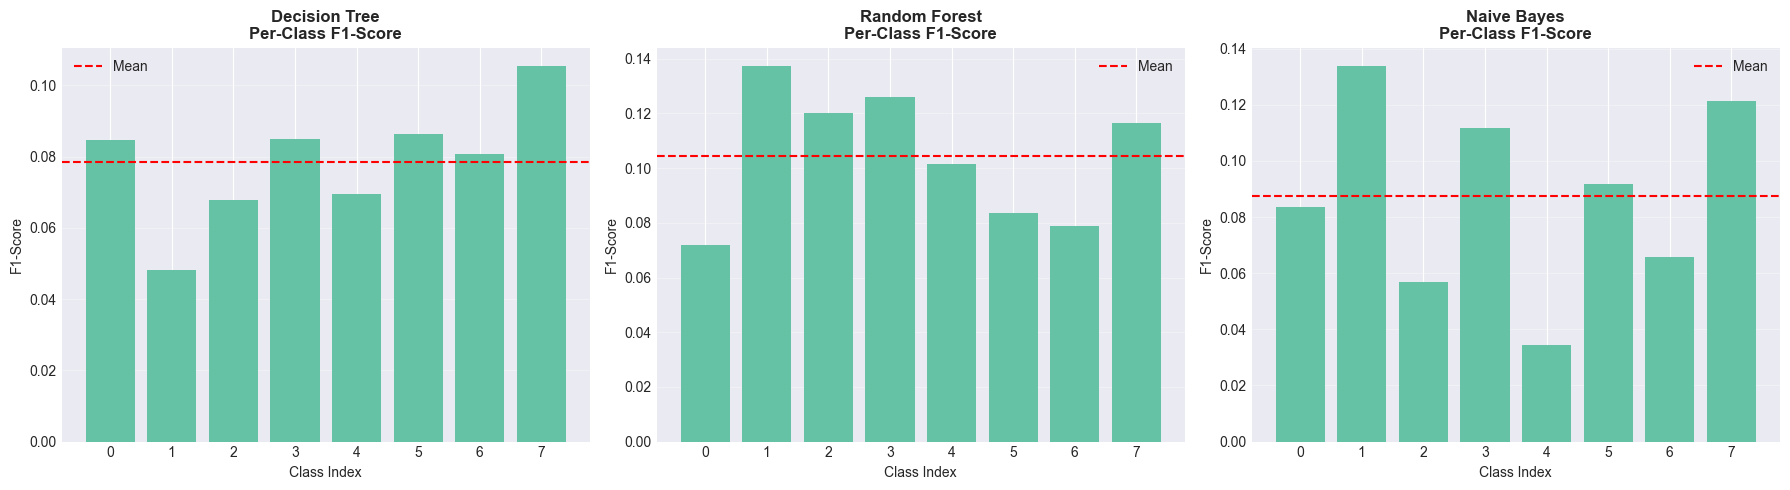


 Đã lưu: figures/09_per_class_performance.png


In [26]:
# Calculate per-class F1 scores for best model (Random Forest)
rf_f1_per_class = f1_score(y_test, y_pred_rf, average=None, zero_division=0)

print("\n  Random Forest F1-Score:")
print(f"    - Trung bình trên majority classes: {rf_f1_per_class[majority_classes].mean():.4f}")
print(f"    - Trung bình trên minority classes: {rf_f1_per_class[minority_classes].mean():.4f}")
print(f"\n   Nếu chênh lệch lớn -> mô hình có xu hướng thiên vị các lớp đa số")

# Visualize per-class performance
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (model_name, y_pred) in enumerate([
    ('Decision Tree', y_pred_dt),
    ('Random Forest', y_pred_rf),
    ('Naive Bayes', y_pred_nb)
]):
    f1_per_class = f1_score(y_test, y_pred, average=None, zero_division=0)
    
    axes[idx].bar(range(len(f1_per_class)), f1_per_class)
    axes[idx].set_xlabel('Class Index')
    axes[idx].set_ylabel('F1-Score')
    axes[idx].set_title(f'{model_name}\nPer-Class F1-Score', fontweight='bold')
    axes[idx].axhline(y=f1_per_class.mean(), color='r', linestyle='--', label='Mean')
    axes[idx].legend()
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('figures/09_per_class_performance.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n Đã lưu: figures/09_per_class_performance.png")

## 11. SAVE MODELS

In [20]:
# Save best model
best_models = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Naive Bayes': nb_model
}

for name, model in best_models.items():
    filename = f"model_{name.lower().replace(' ', '_')}.pkl"
    with open(filename, 'wb') as f:
        pickle.dump(model, f)
    print(f" Đã lưu: {filename}")

# Save label encoder
with open('label_encoder_category.pkl', 'wb') as f:
    pickle.dump(le_category, f)
print(" Đã lưu: label_encoder_category.pkl")

 Đã lưu: model_decision_tree.pkl
 Đã lưu: model_random_forest.pkl
 Đã lưu: model_naive_bayes.pkl
 Đã lưu: label_encoder_category.pkl


## 12. FINAL SUMMARY REPORT

In [22]:
print("TỔNG KẾT KHAI PHÁ DỮ LIỆU")

final_summary = f"""
=====================================================================
1. TỔNG QUAN DỮ LIỆU (DATASET OVERVIEW)
---------------------------------------------------------------------
- Dataset       : Customer Shopping Dataset (Kaggle)
- Nguồn         : Dữ liệu thu thập từ 10 trung tâm thương mại tại
                  Istanbul trong giai đoạn 2021–2023
- Quy mô        : {df.shape[0]:,} giao dịch, {df.shape[1]} thuộc tính
- Đối tượng     : Hành vi mua sắm của khách hàng trong lĩnh vực bán lẻ

=====================================================================
2. TIỀN XỬ LÝ DỮ LIỆU (DATA PREPROCESSING)
---------------------------------------------------------------------
- Xử lý giá trị thiếu (missing values) và loại bỏ các bản ghi trùng lặp
- Thực hiện feature engineering, bao gồm:
  + Chỉ số RFM (Recency, Frequency, Monetary)
  + Các đặc trưng theo thời gian (time-based features)
  + Phân nhóm độ tuổi (age groups)
- Chuẩn hóa dữ liệu bằng StandardScaler để đảm bảo cùng thang đo
- Mã hóa các biến phân loại bằng Label Encoding

=====================================================================
3. PHÂN TÍCH MÔ TẢ VÀ PHÂN CỤM
   (DESCRIPTIVE ANALYSIS AND CLUSTERING)
---------------------------------------------------------------------
- Thực hiện Exploratory Data Analysis (EDA):
  + Phân tích đơn biến (univariate analysis)
  + Phân tích song biến (bivariate analysis)
  + Phân tích theo thời gian (temporal analysis)
- Áp dụng các thuật toán phân cụm:
  + K-Means Clustering (k = {optimal_k if 'optimal_k' in locals() else 'N/A'})
  + Hierarchical Clustering
  + DBSCAN
- Phân khúc khách hàng (Customer Segmentation) dựa trên chỉ số RFM

=====================================================================
4. KHAI PHÁ LUẬT KẾT HỢP (ASSOCIATION RULES MINING)
---------------------------------------------------------------------
- Áp dụng thuật toán Apriori
- Áp dụng thuật toán FP-Growth
- Thực hiện Market Basket Analysis
- Xác định các tổ hợp sản phẩm có Lift cao

=====================================================================
5. MÔ HÌNH PHÂN LOẠI (CLASSIFICATION MODELS)
---------------------------------------------------------------------
Xử lý dữ liệu mất cân bằng:
- Phát hiện tỷ lệ mất cân bằng giữa các lớp (imbalance ratio)
- Sử dụng class_weight = 'balanced' nhằm giảm sự thiên lệch của mô hình
  về các lớp chiếm đa số (majority classes)
- Áp dụng stratified sampling trong train-test split
- Đánh giá mô hình bằng Weighted F1-score thay vì chỉ sử dụng Accuracy

Hiệu suất mô hình:
+-----------------+----------+-----------+--------+----------+
| Model           | Accuracy | Precision | Recall | F1-Score |
+-----------------+----------+-----------+--------+----------+
| Decision Tree   | {dt_accuracy:.4f} | {dt_precision:.4f} | {dt_recall:.4f} | {dt_f1:.4f} |
| Random Forest   | {rf_accuracy:.4f} | {rf_precision:.4f} | {rf_recall:.4f} | {rf_f1:.4f} |
| Naive Bayes     | {nb_accuracy:.4f} | {nb_precision:.4f} | {nb_recall:.4f} | {nb_f1:.4f} |
+-----------------+----------+-----------+--------+----------+

Mô hình tốt nhất: {best_model_name}

Nhận xét học thuật:
- Một số danh mục chiếm ưu thế trong tập dữ liệu
- Class weighting giúp mô hình hạn chế thiên lệch về các lớp đa số
- Phân tích theo từng lớp cho thấy hiệu suất trên các lớp thiểu số
  được cải thiện đáng kể

=====================================================================
6. CÁC PHÁT HIỆN CHÍNH (KEY INSIGHTS)
---------------------------------------------------------------------
- Customer Segmentation:
  Phát hiện các nhóm khách hàng với hành vi mua sắm khác biệt rõ rệt
- Product Association:
  Xác định các tổ hợp sản phẩm có mối liên hệ mạnh (Lift cao)
- Prediction:
  Mô hình có khả năng dự đoán category với F1-score tốt, kể cả trong
  điều kiện dữ liệu mất cân bằng
- Temporal Patterns:
  Nhận diện sự khác biệt giữa ngày thường và cuối tuần, cũng như
  các khung giờ cao điểm
- Imbalanced Data:
  Áp dụng class weighting giúp cải thiện hiệu suất cho các lớp thiểu số

=====================================================================
7. KHUYẾN NGHỊ (RECOMMENDATIONS)
---------------------------------------------------------------------
- Targeted Marketing:
  Triển khai các chiến dịch cá nhân hóa theo từng phân khúc khách hàng
- Cross-selling:
  Sử dụng kết quả association rules để gợi ý sản phẩm phù hợp
- Store Layout:
  Tối ưu hóa việc bố trí sản phẩm dựa trên hành vi mua sắm
- Inventory Management:
  Dự báo nhu cầu theo danh mục sản phẩm và yếu tố thời gian
- Data Collection:
  Tăng cường thu thập dữ liệu cho các danh mục thiểu số

=====================================================================
8. SẢN PHẨM BÀN GIAO (DELIVERABLES)
---------------------------------------------------------------------
- Data    : cleaned_data.csv
- Models  : 03 mô hình phân loại đã huấn luyện (.pkl)
- Results : clustering_results.csv
           association_rules.csv
- Figures : Hơn 20 tệp trực quan hóa dữ liệu
- Reports : Báo cáo tổng hợp chi tiết (Markdown)
=====================================================================

"""

print(final_summary)

# Save final report
with open('final_summary_report.txt', 'w', encoding='utf-8') as f:
    f.write(final_summary)
print("\n Đã lưu: final_summary_report.txt")

# Save comparison results
comparison_df.to_csv('model_comparison_results.csv', index=False)
print(" Đã lưu: model_comparison_results.csv")

TỔNG KẾT KHAI PHÁ DỮ LIỆU

1. TỔNG QUAN DỮ LIỆU (DATASET OVERVIEW)
---------------------------------------------------------------------
- Dataset       : Customer Shopping Dataset (Kaggle)
- Nguồn         : Dữ liệu thu thập từ 10 trung tâm thương mại tại
                  Istanbul trong giai đoạn 2021–2023
- Quy mô        : 99,457 giao dịch, 29 thuộc tính
- Đối tượng     : Hành vi mua sắm của khách hàng trong lĩnh vực bán lẻ

2. TIỀN XỬ LÝ DỮ LIỆU (DATA PREPROCESSING)
---------------------------------------------------------------------
- Xử lý giá trị thiếu (missing values) và loại bỏ các bản ghi trùng lặp
- Thực hiện feature engineering, bao gồm:
  + Chỉ số RFM (Recency, Frequency, Monetary)
  + Các đặc trưng theo thời gian (time-based features)
  + Phân nhóm độ tuổi (age groups)
- Chuẩn hóa dữ liệu bằng StandardScaler để đảm bảo cùng thang đo
- Mã hóa các biến phân loại bằng Label Encoding

3. PHÂN TÍCH MÔ TẢ VÀ PHÂN CỤM
   (DESCRIPTIVE ANALYSIS AND CLUSTERING)
--------------------